# Step 1: Install and import modules

In [3]:
!pip install opencv-python
!pip install matplotlib
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [31]:
!pip install torch==1.7.1+cpu torchvision==0.8.2+cpu torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
!pip install easyocr

Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.7.1+cpu (from versions: 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1, 2.2.2, 2.3.0)
ERROR: No matching distribution found for torch==1.7.1+cpu

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


# Step 2: Image loading and text recognition using EasyOCR

In [21]:
# im_1_path = 'output_images/image1/image1_Cei.jpeg'
im_2_path = 'output_images/image2/image2_Cei_binarized.jpeg'
im_3_path = 'output_images/image3/image3_Cei.jpeg'
im_4_path = 'output_images/image4/image4_Cei.jpeg'
im_5_path = 'output_images/image5/image5_Cei.jpeg'

In [29]:
def recognize_text(img_path):
    '''loads an image and recognizes text.'''
    
    reader = easyocr.Reader(['en'])
    print('y')
    return reader.readtext(img_path)

In [6]:
result1 = recognize_text(im_1_path)
result2 = recognize_text(im_2_path)
result3 = recognize_text(im_3_path)
result4 = recognize_text(im_4_path)
result5 = recognize_text(im_5_path)
result6 = recognize_text(im_6_path)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster wi

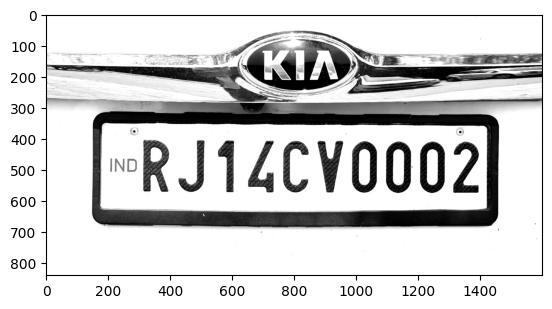

In [17]:
img_1 = cv2.imread(im_1_path)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)

# Step 3: Overlay recognized text on image using OpenCV

In [27]:
def overlay_ocr_text(img_path, save_name):
    '''loads an image, recognizes text, and overlays the text on the image.'''
    
    # loads image
    img = cv2.imread(img_path)
    clear_image = np.zeros(img.shape)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,3, figsize=(fig_width, fig_height)) 
    axarr[0].imshow(img)
    
    # recognize text
    result = recognize_text(img_path)

    # if OCR prob is over 0.5, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.5:
            # display 
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            top_right = (int(top_right[0]), int(top_right[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))
            bottom_left = (int(bottom_left[0]), int(bottom_left[1]))

            # # create a rectangle for bbox display
            cv2.rectangle(img=clear_image, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=1)

            # put recognized text
            cv2.putText(img=clear_image, text=text, org=((top_left[0]+bottom_left[0])//2, (top_left[1]+bottom_left[1])//2), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=max(0.3, (((top_right[0] - top_left[0])*40)//(len(text)*img.shape[0]))), color=(255, 0, 0), thickness=2)
        
    # show and save image
    axarr[1].imshow(img)
    axarr[2].imshow(clear_image)
    # plt.savefig(f'./output/{save_name}_overlay.jpg', bbox_inches='tight')

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:992)>

<Figure size 640x480 with 0 Axes>

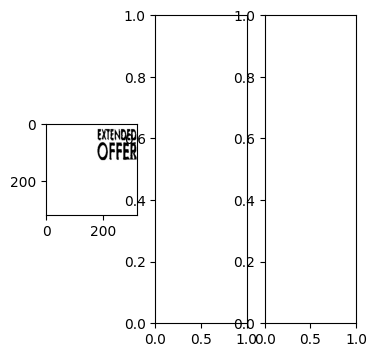

In [30]:
image_name, format = im_2_path.split('/')[-2], im_2_path.split('/')[-1].split('.')[1]
im_2_path = 'output_images/image2/image2_Cei_binarized.jpeg'

overlay_ocr_text(im_2_path, f'output_images/{image_name}/{image_name}_detection.{format}')

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Detected text: NOTICE (Probability: 1.00)
Detected text: THANK YOU (Probability: 0.89)
Detected text: FOR NOTICING THIS (Probability: 0.68)
Detected text: NEW NOTICE (Probability: 0.97)
Detected text: YOUR NOTICING (Probability: 0.82)
Detected text: IT (Probability: 0.64)
Detected text: HAS BEEN NOTED (Probability: 0.73)
Detected text: AND WILL (Probability: 0.82)
Detected text: BE REPORTED TO THE AUTHORITIES (Probability: 0.66)


<Figure size 640x480 with 0 Axes>

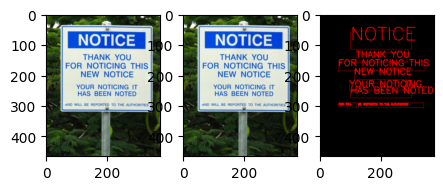

In [118]:
overlay_ocr_text(im_2_path, '2_carplate')

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Detected text: CCC 444 (Probability: 0.51)
Detected text: Z500 (Probability: 0.59)
Detected text: 3S00 (Probability: 0.55)


<Figure size 640x480 with 0 Axes>

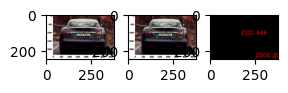

In [119]:
overlay_ocr_text(im_3_path, '1_carplate')

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Detected text: NOTICE (Probability: 1.00)
Detected text: THANK YOU (Probability: 0.98)
Detected text: FOR (Probability: 1.00)
Detected text: NOTICING THIS (Probability: 0.96)
Detected text: NEW NOTICE (Probability: 0.89)
Detected text: YOUR (Probability: 1.00)
Detected text: NOTICING (Probability: 0.83)
Detected text: HAS (Probability: 1.00)
Detected text: BEEN (Probability: 1.00)
Detected text: NOTED (Probability: 1.00)


<Figure size 640x480 with 0 Axes>

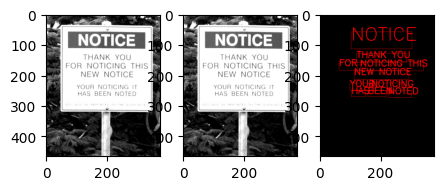

In [120]:
overlay_ocr_text(im_4_path, '1_carplate')

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


<Figure size 640x480 with 0 Axes>

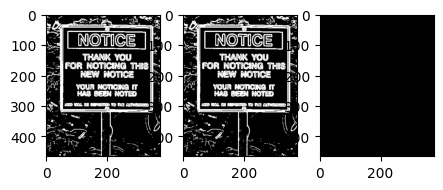

In [121]:
overlay_ocr_text(im_5_path, '1_carplate')

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Detected text: THANK YOU (Probability: 0.97)
Detected text: FOR (Probability: 1.00)
Detected text: NOTICING THIS (Probability: 0.95)
Detected text: NEW NOTICE (Probability: 0.92)
Detected text: YOUR NOTICING (Probability: 0.69)
Detected text: HAS (Probability: 1.00)
Detected text: BEEN (Probability: 1.00)
Detected text: NOTED (Probability: 1.00)


<Figure size 640x480 with 0 Axes>

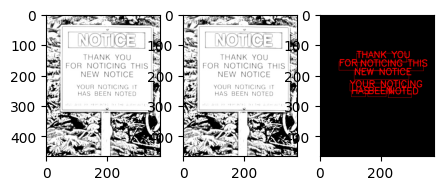

In [122]:
overlay_ocr_text(im_6_path, '1_carplate')

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Detected text: NOTiCe (Probability: 0.52)


<Figure size 640x480 with 0 Axes>

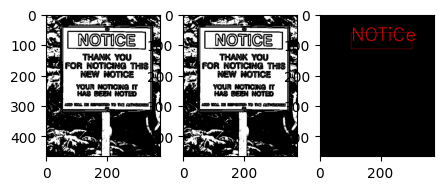

In [123]:
overlay_ocr_text(im_7_path, '1_carplate')

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Detected text: Send (Probability: 0.75)


<Figure size 640x480 with 0 Axes>

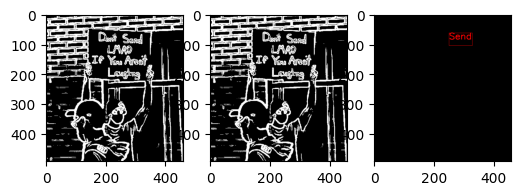

In [124]:
overlay_ocr_text(im_8_path, '1_carplate')

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


<Figure size 640x480 with 0 Axes>

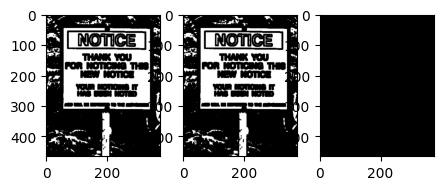

In [125]:
overlay_ocr_text(im_9_path, '5_roadsign')

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Detected text: Lvad (Probability: 0.61)


<Figure size 640x480 with 0 Axes>

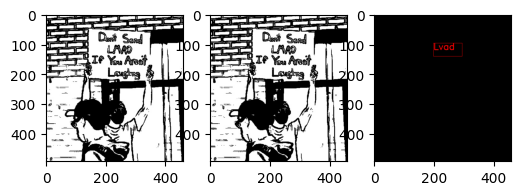

In [126]:
overlay_ocr_text(im_10_path, '1_carplate')

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Detected text: Dont  Send (Probability: 0.56)
Detected text: If You Arent (Probability: 0.72)
Detected text: Laglng (Probability: 0.56)


<Figure size 640x480 with 0 Axes>

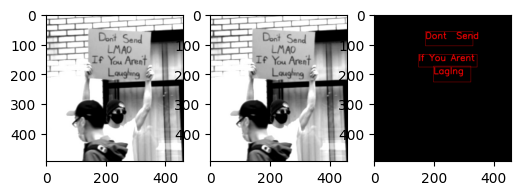

In [127]:
overlay_ocr_text(im_11_path, '1_carplate')

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Detected text: Dont  Send (Probability: 0.67)
Detected text: LMAO (Probability: 0.76)
Detected text: If You Arenf (Probability: 0.66)


<Figure size 640x480 with 0 Axes>

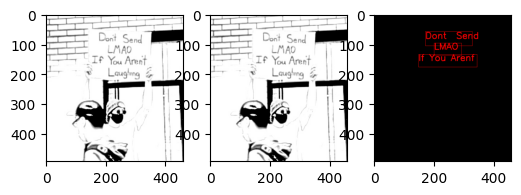

In [128]:
overlay_ocr_text(im_12_path, '1_carplate')

# Bonus: Text-to-speech recognition 

In [115]:
!pip install pyttsx3

Defaulting to user installation because normal site-packages is not writeable


In [16]:
result = recognize_text(im_5_path)

sentence = ''
for (bbox, text, prob) in result:
    sentence += f'{text} '
print(sentence)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


NOTICE THANK YOU FOR NOTICING THIS NEW NOTICE YOUR NOTICING IT HAS BEEN NOTED AND WILL BE REPORTED TO THE AUTHORITIES 


In [17]:
import pyttsx3

engine = pyttsx3.init()
engine.setProperty('rate', 100)
engine.say(sentence)
engine.runAndWait()